In [1]:
from __future__ import print_function
import sys, os, math
import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns
sns.set_style('dark')
sns.set_context('talk')
from lightning import Lightning

/groups/turaga/home/turagas/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
# Relative path to where PyGreentea resides
pygt_path = '../../PyGreentea'
sys.path.append(os.path.join(os.getcwd(), pygt_path))

# Load PyGreentea
import PyGreentea as pygt

cmap = matplotlib.colors.ListedColormap(np.vstack(((0,0,0),np.random.rand(255,3))))

In [3]:
# Load the datasets
raw_h5_fname = '/groups/turaga/home/turagas/data/FlyEM/fibsem_medulla_7col/tstvol-520-1-h5/img_normalized.h5'
gt_h5_fname = '/groups/turaga/home/turagas/data/FlyEM/fibsem_medulla_7col/tstvol-520-1-h5/groundtruth_seg_thick.h5'
aff_h5_fname = '/groups/turaga/home/turagas/data/FlyEM/fibsem_medulla_7col/tstvol-520-1-h5/groundtruth_aff.h5'
test_h5_fname = 'test_out_0.h5'

raw_h5f = h5py.File(raw_h5_fname,'r')
gt_h5f = h5py.File(gt_h5_fname,'r')
aff_h5f = h5py.File(aff_h5_fname,'r')
test_h5f = h5py.File(test_h5_fname,'r')

raw = raw_h5f['main']
gt = gt_h5f['main']
aff = aff_h5f['main']
test = test_h5f['main']

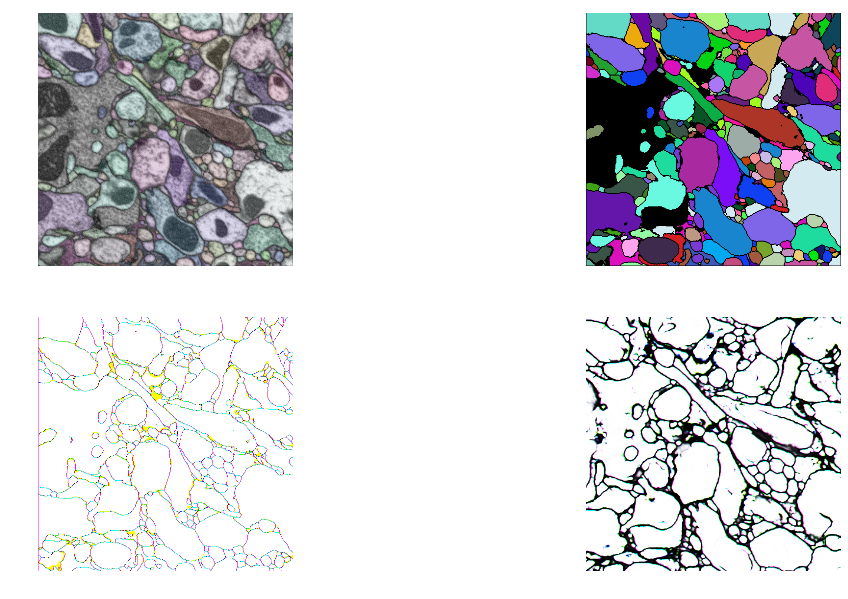

In [4]:
z=50; offset=44
plt.rcParams['figure.figsize'] = (18.0, 10.0)

raw_slc=np.transpose(np.squeeze(raw[z+offset,:,:]),(1,0));
gt_slc=np.transpose(np.squeeze(gt[z+offset,:,:]),(1,0))
aff_slc=np.transpose(np.squeeze(aff[:,z+offset,:,:]),(2,1,0)).astype(np.float)
test_slc=np.transpose(np.squeeze(test[:,z,:,:]),(2,1,0))

plt.subplot(2,2,1)
plt.axis('off')
plt.imshow(raw_slc,cmap=plt.cm.get_cmap('gray'))

plt.imshow(gt_slc,cmap=cmap,alpha=0.15);


plt.subplot(2,2,2)
plt.axis('off')
plt.imshow(gt_slc,cmap=cmap);

plt.subplot(2,2,3)
plt.axis('off')
plt.imshow(aff_slc,cmap=plt.cm.get_cmap('gray'));

plt.subplot(2,2,4)
plt.axis('off')
plt.imshow(test_slc,cmap=plt.cm.get_cmap('gray'));

plt.show()